# 📚 Python Libraries

In [ ]:
# DATA MANIPULATION
import pandas as pd
import numpy as np

# DATA VISUALISATION
import matplotlib.pyplot as plt


# MACHINE LEARNING

## PREPROCESSING
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


## MODELLING
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

## EVALUATING
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# 💾 Dataset

We will work on the dataset available on Kaggle [here](https://www.kaggle.com/datasets/shubhammeshram579/bank-customer-churn-prediction). Download the dataset and add it to your Google Colab.

In [ ]:
data = pd.read_csv("/content/NexGen.csv")

In [ ]:
data.shape

(18766, 32)

In [ ]:
data.dtypes

user_id                           object
transaction_id                    object
age                                int64
Age_categories                    object
country                           object
city                              object
crypto_status                     object
avg_transactions                 float64
num_transactions                   int64
plan                              object
notifications_marketing_push     float64
notifications_marketing_email    float64
num_contacts                       int64
login_data                        object
reason                            object
channel                           object
status                            object
notification_date                 object
brand                             object
transactions_type                 object
transactions_currency             object
amount_usd                       float64
transactions_state                object
ea_cardholderpresence             object
direction       

In [ ]:
data.dtypes.value_counts()

object     22
int64       6
float64     4
Name: count, dtype: int64

In [ ]:
data.head()

,user_id,transaction_id,age,Age_categories,country,city,crypto_status,avg_transactions,num_transactions,plan,...,transactions_state,ea_cardholderpresence,direction,transaction_data,num_notifications,last_activity_date,referral_behavior,is_churned,is_active,user_status
0,user_9050,transaction_997248,40,40s,Spain,Casares,Not Unlocked Crypto,0.000093,256,STANDARD,...,REVERTED,TRUE,OUTBOUND,2019-05-11,1,2019-05-11,Non-referrer,0,1,active
1,user_8920,transaction_545338,50,50s,Romania,București,Unlocked Crypto,0.000093,256,STANDARD,...,REVERTED,TRUE,OUTBOUND,2019-05-11,1,2019-05-11,Non-referrer,0,1,active
2,user_12919,transaction_2710446,27,20s,United Kingdom,Bishop's Stortford,Not Unlocked Crypto,0.000093,256,STANDARD,...,REVERTED,TRUE,OUTBOUND,2019-05-09,1,2019-05-09,Non-referrer,0,1,active
3,user_16149,transaction_2737048,54,50s,Denmark,Esbjerg,Not Unlocked Crypto,0.000093,256,STANDARD,...,REVERTED,TRUE,OUTBOUND,2019-05-07,0,2019-05-07,Non-referrer,0,1,active
4,user_16497,transaction_2545566,33,30s,Romania,Hateg,Not Unlocked Crypto,0.000093,256,STANDARD,...,REVERTED,TRUE,OUTBOUND,2019-05-12,1,2019-05-12,Non-referrer,0,1,active


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.isna().sum()

user_id                             0
transaction_id                      0
age                                 0
Age_categories                      0
country                             0
city                                0
crypto_status                       0
avg_transactions                    0
num_transactions                    0
plan                                0
notifications_marketing_push        0
notifications_marketing_email       0
num_contacts                        0
login_data                          0
reason                            429
channel                           429
status                            429
notification_date                 429
brand                               0
transactions_type                   0
transactions_currency               0
amount_usd                          0
transactions_state                  0
ea_cardholderpresence            7015
direction                           0
transaction_data                    0
num_notifica

In [ ]:
data.dropna(inplace=True)

In [ ]:
data = data.drop(columns=["ea_cardholderpresence"])
data = data.drop(columns=["user_id"])
data = data.drop(columns=["transaction_id"])
data = data.drop(columns=["is_active"])
data = data.drop(columns=["referral_behavior"])
data = data.drop(columns=["last_activity_date"])
data = data.drop(columns=["is_churned"])

In [ ]:
dataset = pd.concat([
    data[data['user_status'] == 'active'].sample(2100, replace=True),
    data[data['user_status'] == 'regular'].sample(2100, replace=True),
    data[data['user_status'] == 'churned'].sample(2100, replace=True),
    data[data['user_status'] == 'at_risk']
])

# 🎯 Define the target `y` and the features `X`

In [ ]:
y = data["user_status"]

In [ ]:
y.value_counts()

user_status
active     8663
regular    1699
at_risk     743
churned     464
Name: count, dtype: int64

In [ ]:
round(y.value_counts(normalize=True),2)

user_status
active     0.75
regular    0.15
at_risk    0.06
churned    0.04
Name: proportion, dtype: float64

In [ ]:
X = data.drop(columns= ["user_status"])

# 💈 Train-Test Split ("Holdout Method")

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.30)

In [ ]:
X.shape, X_train.shape, X_test.shape

((11569, 24), (8098, 24), (3471, 24))

In [ ]:
round(6997/9996,2)

0.7

In [ ]:
round(2999/9996,2)

0.3

# 🧼 Data Preparation/Preprocessing

## 🔢 Scale the numerical features

In [ ]:
X_train_num = X_train.select_dtypes(include=np.number)
X_test_num = X_test.select_dtypes(include=np.number)

In [ ]:
X_train_num.head(3)

,age,avg_transactions,num_transactions,notifications_marketing_push,notifications_marketing_email,num_contacts,amount_usd,num_notifications
6003,27,0.000127,348,1.0,1.0,3,425.53,1
17386,57,0.000015,41,-1.0,-1.0,38,104.37,1
11511,32,0.000001,4,1.0,1.0,0,12.77,1


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler().set_output(transform="pandas")
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

In [ ]:
X_train_num_scaled.head(3)

,age,avg_transactions,num_transactions,notifications_marketing_push,notifications_marketing_email,num_contacts,amount_usd,num_notifications
6003,-1.164199,0.443897,0.443897,0.768411,0.808057,-0.329998,-0.021042,0.179582
17386,1.710123,-0.585751,-0.585751,-1.364440,-1.342689,0.284979,-0.021042,0.179582
11511,-0.685145,-0.709846,-0.709846,0.768411,0.808057,-0.382710,-0.021042,0.179582


## 🔠 Encode the categorical features

In [ ]:
X_train_cat = X_train.select_dtypes(exclude=np.number)
X_test_cat = X_test.select_dtypes(exclude=np.number)

In [ ]:
X_train_cat.head(3)

,Age_categories,country,city,crypto_status,plan,login_data,reason,channel,status,notification_date,brand,transactions_type,transactions_currency,transactions_state,direction,transaction_data
6003,20s,Hungary,Budapest,Unlocked Crypto,METAL,2018-08-30,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,2019-04-16,Apple,TRANSFER,HUF,REVERTED,OUTBOUND,2019-05-11
17386,50s,Romania,Bucharest,Not Unlocked Crypto,STANDARD,2018-04-16,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,2019-04-16,Android,TOPUP,RON,REVERTED,OUTBOUND,2019-02-19
11511,30s,Germany,Bad Honnef,Unlocked Crypto,STANDARD,2018-02-02,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,2019-02-22,Apple,TOPUP,EUR,REVERTED,OUTBOUND,2018-12-06


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse_output=False,
                        handle_unknown="ignore",
                        drop="if_binary").set_output(transform="pandas")

X_train_cat_encoded = encoder.fit_transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 9, 12, 15] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
X_train_cat_encoded.head(3)

,Age_categories_20s,Age_categories_30s,Age_categories_40s,Age_categories_50s,Age_categories_60s,Age_categories_70s,Age_categories_80s,country_Austria,country_Belgium,country_Bulgaria,...,transaction_data_2019-05-07,transaction_data_2019-05-08,transaction_data_2019-05-09,transaction_data_2019-05-10,transaction_data_2019-05-11,transaction_data_2019-05-12,transaction_data_2019-05-13,transaction_data_2019-05-14,transaction_data_2019-05-15,transaction_data_2019-05-16
6003,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17386,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11511,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 🔢 + 🔠 Concatenating the two streams

In [ ]:
X_train_preprocessed = pd.concat([X_train_num_scaled, X_train_cat_encoded], axis = "columns")
X_test_preprocessed = pd.concat([X_test_num_scaled, X_test_cat_encoded], axis = "columns")

In [ ]:
X_train_preprocessed.head()

,age,avg_transactions,num_transactions,notifications_marketing_push,notifications_marketing_email,num_contacts,amount_usd,num_notifications,Age_categories_20s,Age_categories_30s,...,transaction_data_2019-05-07,transaction_data_2019-05-08,transaction_data_2019-05-09,transaction_data_2019-05-10,transaction_data_2019-05-11,transaction_data_2019-05-12,transaction_data_2019-05-13,transaction_data_2019-05-14,transaction_data_2019-05-15,transaction_data_2019-05-16
6003,-1.164199,0.443897,0.443897,0.768411,0.808057,-0.329998,-0.021042,0.179582,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17386,1.710123,-0.585751,-0.585751,-1.364440,-1.342689,0.284979,-0.021042,0.179582,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11511,-0.685145,-0.709846,-0.709846,0.768411,0.808057,-0.382710,-0.021042,0.179582,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8698,1.710123,2.389161,2.389161,0.768411,0.808057,-0.171861,-0.021042,0.179582,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7425,0.943637,-0.307377,-0.307377,0.768411,0.808057,-0.382710,-0.021042,0.179582,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 🤖 Modelling

## 🏎️ Instantiating a model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

## 🏋🏻‍♀️ Train (`.fit`) the model

In [ ]:
model.fit(X_train_preprocessed, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## 👩🏿‍🏫 Evaluate (`.score`) the model

In [ ]:
model.score(X_test_preprocessed, y_test)

0.9795447997695189

📚 [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

## 🔮 Predictions & Confusion Matrix

In [ ]:
y_test.value_counts()

user_status
active     2593
regular     524
at_risk     219
churned     135
Name: count, dtype: int64

In [ ]:
round(y_test.value_counts(normalize=True),2)

user_status
active     0.75
regular    0.15
at_risk    0.06
churned    0.04
Name: proportion, dtype: float64

In [ ]:
y_pred = model.predict(X_test_preprocessed)
y_pred

array(['active', 'active', 'active', ..., 'regular', 'active', 'active'],
      dtype=object)

In [ ]:
X_test

,age,Age_categories,country,city,crypto_status,avg_transactions,num_transactions,plan,notifications_marketing_push,notifications_marketing_email,...,status,notification_date,brand,transactions_type,transactions_currency,amount_usd,transactions_state,direction,transaction_data,num_notifications
7293,54,50s,United Kingdom,Newcastle Upon Tyne,Not Unlocked Crypto,0.000044,121,STANDARD,-1.0,-1.0,...,SENT,2019-03-12,Android,TRANSFER,GBP,550.00,REVERTED,OUTBOUND,2019-04-26,1
9207,32,30s,Spain,Tegueste,Not Unlocked Crypto,0.000065,178,STANDARD,-1.0,-1.0,...,SENT,2019-01-21,Android,TRANSFER,GBP,255.32,REVERTED,OUTBOUND,2019-05-11,1
2866,36,30s,Czech Republic,Praha,Unlocked Crypto,0.000015,41,STANDARD,1.0,0.0,...,SENT,2019-03-11,Apple,TRANSFER,CZK,1157.48,REVERTED,OUTBOUND,2019-05-03,1
7249,30,30s,United Kingdom,Romford,Not Unlocked Crypto,0.000044,120,STANDARD,1.0,1.0,...,SENT,2019-02-21,Apple,TRANSFER,GBP,200.00,REVERTED,OUTBOUND,2019-05-09,1
8934,39,30s,Italy,Pralungo/Biella,Not Unlocked Crypto,0.000062,169,STANDARD,1.0,1.0,...,SENT,2019-05-07,Android,TRANSFER,USD,723.40,REVERTED,OUTBOUND,2019-05-09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5638,35,30s,United Kingdom,Kingussie,Not Unlocked Crypto,0.000031,86,STANDARD,1.0,1.0,...,SENT,2019-03-06,Apple,TRANSFER,GBP,262.80,REVERTED,OUTBOUND,2019-05-11,1
9036,56,50s,United Kingdom,Sutton,Not Unlocked Crypto,0.000063,172,STANDARD,-1.0,-1.0,...,SENT,2019-03-13,Apple,TRANSFER,GBP,3241.00,REVERTED,OUTBOUND,2019-05-09,1
17757,55,50s,United Kingdom,Bourne,Not Unlocked Crypto,0.000021,58,STANDARD,-1.0,-1.0,...,SENT,2019-03-05,Apple,TRANSFER,ZAR,2000.00,REVERTED,OUTBOUND,2019-04-10,1
8029,37,30s,Belgium,Schaerbeek,Not Unlocked Crypto,0.000051,140,STANDARD,1.0,1.0,...,SENT,2019-01-06,Android,TRANSFER,EUR,170.21,REVERTED,OUTBOUND,2019-05-12,1


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[2593,    0,    0,    0],
       [   4,  199,    9,    7],
       [   4,   22,   86,   23],
       [   1,    0,    1,  522]])

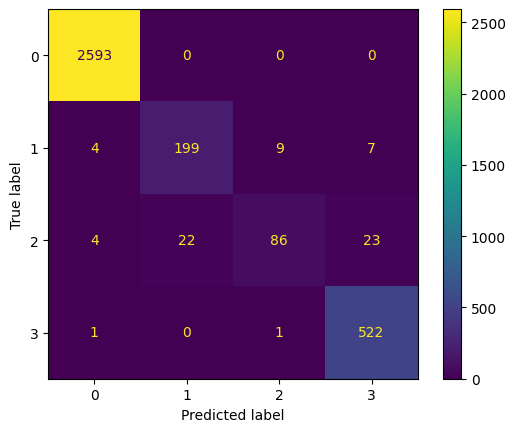

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      active       1.00      1.00      1.00      2593
     at_risk       0.90      0.91      0.90       219
     churned       0.90      0.64      0.74       135
     regular       0.95      1.00      0.97       524

    accuracy                           0.98      3471
   macro avg       0.93      0.89      0.90      3471
weighted avg       0.98      0.98      0.98      3471



# 👹 Modelling

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier()
model.fit(X_train_preprocessed, y_train)
model.score(X_test_preprocessed, y_test)

0.8634399308556612

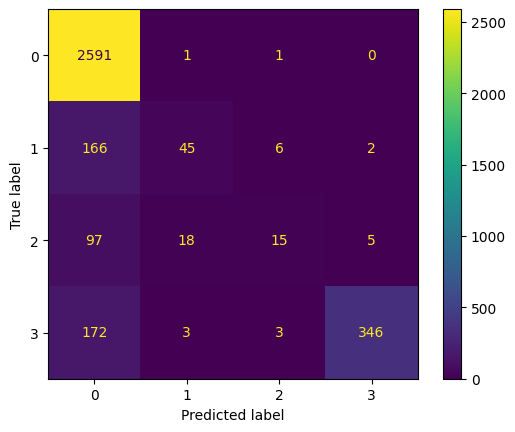

In [ ]:
y_pred = model.predict(X_test_preprocessed)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      active       0.86      1.00      0.92      2593
     at_risk       0.67      0.21      0.31       219
     churned       0.60      0.11      0.19       135
     regular       0.98      0.66      0.79       524

    accuracy                           0.86      3471
   macro avg       0.78      0.49      0.55      3471
weighted avg       0.85      0.86      0.84      3471



In [ ]:
pd.Series(y_pred).value_counts()

active     3026
regular     353
at_risk      67
churned      25
Name: count, dtype: int64

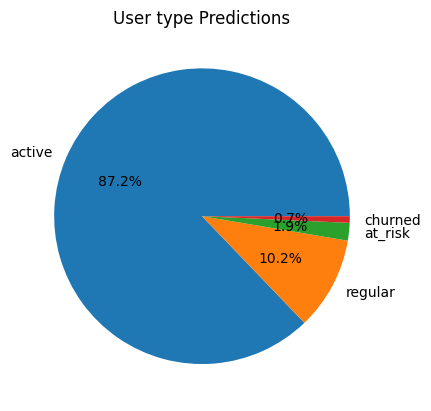

In [ ]:
engagement = pd.Series(y_pred).value_counts()
labels = engagement.index.tolist()
values = engagement.values.tolist()

plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title("User type Predictions")
plt.show()

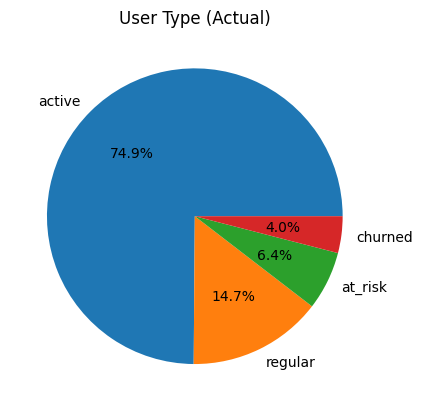

In [ ]:
actual_engagement = data['user_status'].value_counts()

actual_labels = actual_engagement.index.tolist()
actual_values = actual_engagement.values.tolist()

plt.pie(actual_values, labels=actual_labels, autopct='%1.1f%%')
plt.title("User Type (Actual)")
plt.show()